# Histograma da imagem

Uma imagem normalmente é composta de um grande número de pixels; hoje em dia, celulares tiram fotografias com a resolução espacial que produz alguns milhões de pixels. Uma das caracterizações ou "assinaturas" mais eficientes de uma imagem é seu histograma.

In [75]:
import numpy as np
import matplotlib.image as mpimg
 
f = mpimg.imread('../data/cameraman.tif')  
print(f.min(), f.max())

0 251


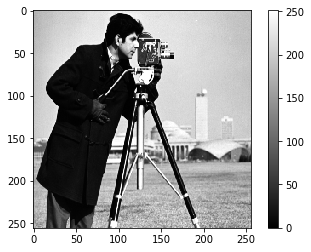

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(f, cmap = 'gray')
plt.colorbar()

In [77]:
nbins = 20
h, bin_edges = np.histogram(f, nbins,(0,255))
print('h=\n',h)
print('bins=\n',bin_edges)

h=
 [10618  7040   918   839   797   586   652   536   455   574  1069  1634
  2569  3927  5319  8057 10160  6244  2263  1279]
bins=
 [   0.     12.75   25.5    38.25   51.     63.75   76.5    89.25  102.
  114.75  127.5   140.25  153.    165.75  178.5   191.25  204.    216.75
  229.5   242.25  255.  ]


O que temos no retorno da função *np.histogram* é a contagem do número de pixels com valores em uma determinada faixa. No exemplo acima, a imagem do *cameramen* possui **10618** pixels com valor entre **0** e **12,75**. Podemos visualizar o histograma através da função *plot* do matplotlib.

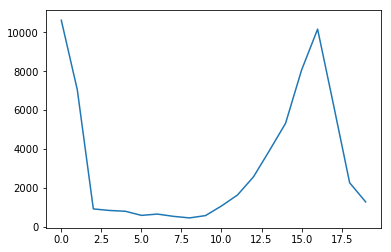

In [78]:
plt.plot(h)

Veja que a visualização acima não é muito adequada, já que o histograma não é uma função contínua. Uma forma melhor de visualizarmos o histograma é usando um gráfico de barras. E, no eixo das abscissas, queremos mostrar o valor do nível de cinza computado (*bin center*) e não os limites de cada faixa (*bin edges*), como o retornado pela função np.histogram.

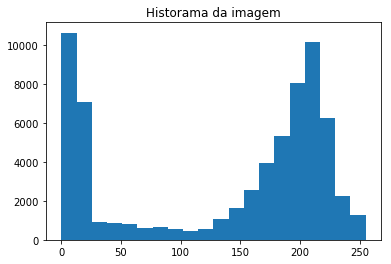

In [79]:
w=255./nbins
bin_centers = bin_edges[1:]-(w/2)
plt.bar(bin_centers, h, width=w)
plt.title('Historama da imagem')

## Histograma x informação de localização

O histograma contém informações importantes da imagem e é bastante utilizado para diversos algoritmos de processamento, como por exemplo, segmentação por limiarização. Porém, ao computar a quantidade de pixels para cada valor de nível de cinza, o histograma não leva em consideração a localização dos pixels. Isso pode ser visto no exemplo abaixo, onde embaralhamos os pixels de uma imagem, e o histograma permanece o mesmo.

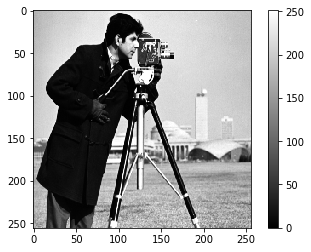

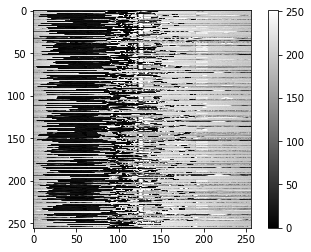

In [96]:
f = mpimg.imread('../data/cameraman.tif')  

fs = f.copy()
np.random.shuffle(fs) # embaralha os pixels da imagem os deixando em outra ordem

plt.figure()
plt.imshow(f, cmap = 'gray')
plt.colorbar()

plt.figure()
plt.imshow(fs, cmap = 'gray')
plt.colorbar()


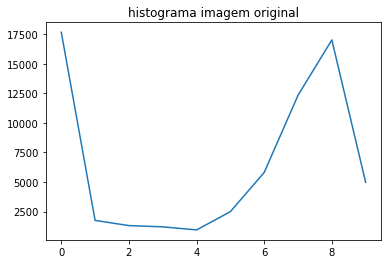

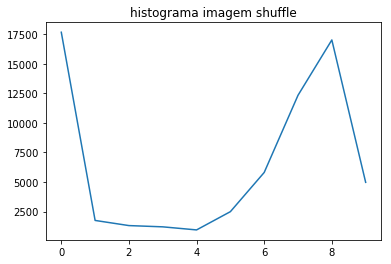

In [97]:
h, bins = np.histogram(f)
plt.figure()
plt.plot(h)
plt.title('histograma imagem original')

hshuffle, binshuffle = np.histogram(fs)
plt.figure()
plt.plot(hshuffle)
plt.title('histograma imagem shuffle')

